# Task 5- Exploratory Data Analysis - Sports

### Author- Parthavi Vaghani

#### objective - find out the most successful teams, players and factors contributing win or loss of a team.

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the datasets

In [2]:
df1 = pd.read_csv('/Users/apple/eclipse-workspace/Indian-Premier-League-Analysis/Database/deliveries.csv')
df2 = pd.read_csv('/Users/apple/eclipse-workspace/Indian-Premier-League-Analysis/Database/matches.csv')

## Display the first few rows of each dataset

In [3]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Check the basic information about each dataset

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Check for missing values in each dataset

In [7]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Drop rows with any missing values in df2 

In [9]:
df2.dropna(inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 636 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               118 non-null    int64 
 1   season           118 non-null    int64 
 2   city             118 non-null    object
 3   date             118 non-null    object
 4   team1            118 non-null    object
 5   team2            118 non-null    object
 6   toss_winner      118 non-null    object
 7   toss_decision    118 non-null    object
 8   result           118 non-null    object
 9   dl_applied       118 non-null    int64 
 10  winner           118 non-null    object
 11  win_by_runs      118 non-null    int64 
 12  win_by_wickets   118 non-null    int64 
 13  player_of_match  118 non-null    object
 14  venue            118 non-null    object
 15  umpire1          118 non-null    object
 16  umpire2          118 non-null    object
 17  umpire3          118 non-null    objec

## Convert date column to datetime format in df2

In [11]:
df2['date'] = pd.to_datetime(df2['date'])

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_47981/3058631792.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['date'] = pd.to_datetime(df2['date'])


In [12]:
df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,2018,Mumbai,2018-07-04,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,2018-08-04,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,2018-08-04,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,2018-09-04,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,2018-10-04,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,2019-05-05,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


## Descriptive statistics for both the datasets

In [13]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [36]:
df2.describe()

,id,season,date,dl_applied,win_by_runs,win_by_wickets
count,118.000000,118.000000,118,118.000000,118.000000,118.000000
mean,9572.610169,2018.491525,2018-11-13 14:26:26.440677888,0.025424,11.355932,3.271186
min,7894.000000,2018.000000,2018-01-05 00:00:00,0.000000,0.000000,0.000000
25%,7923.250000,2018.000000,2018-05-13 00:00:00,0.000000,0.000000,0.000000
50%,7952.500000,2018.000000,2018-12-05 00:00:00,0.000000,0.000000,4.000000
75%,11319.750000,2019.000000,2019-04-17 18:00:00,0.000000,14.000000,6.000000
max,11415.000000,2019.000000,2019-12-05 00:00:00,1.000000,118.000000,10.000000
std,1685.654201,0.502060,NaN,0.158080,21.090981,3.233534


## Unique values for categorical columns in df1

In [15]:
df1['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
df1['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

## Unique values for categorical columns in df2

In [17]:
df2['team1'].unique()

array(['Mumbai Indians', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Delhi Capitals'], dtype=object)

In [18]:
df2['team2'].unique()

array(['Chennai Super Kings', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Delhi Capitals'], dtype=object)

# EDA with Visualizations

## Histogram for Distribution of runs scored in each over

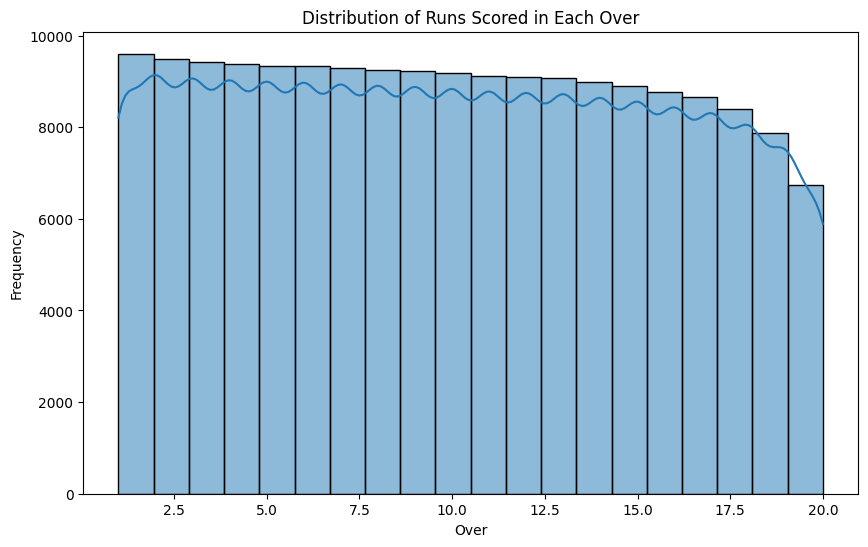

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='over', bins=20, kde=True)
plt.title('Distribution of Runs Scored in Each Over')
plt.xlabel('Over')
plt.ylabel('Frequency')
plt.show()

## Number of matches won by each team

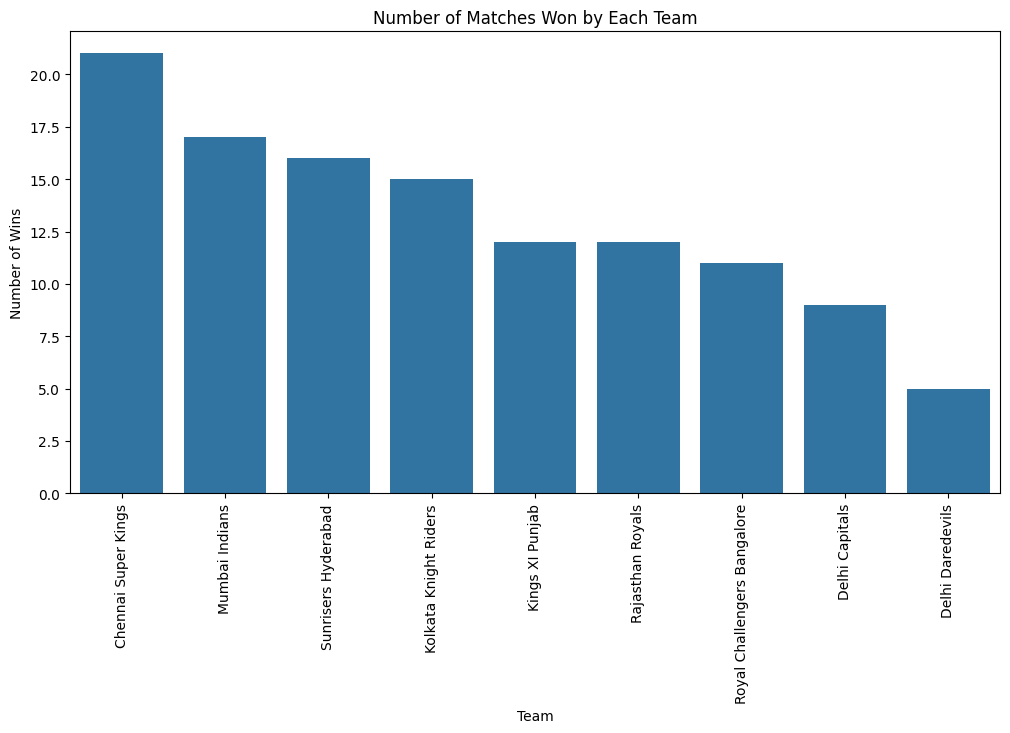

In [20]:
plt.figure(figsize=(12, 6))
match_wins = df2['winner'].value_counts()
sns.barplot(x=match_wins.index, y=match_wins.values)
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

## horizontal bar chart for Matches played in each city 

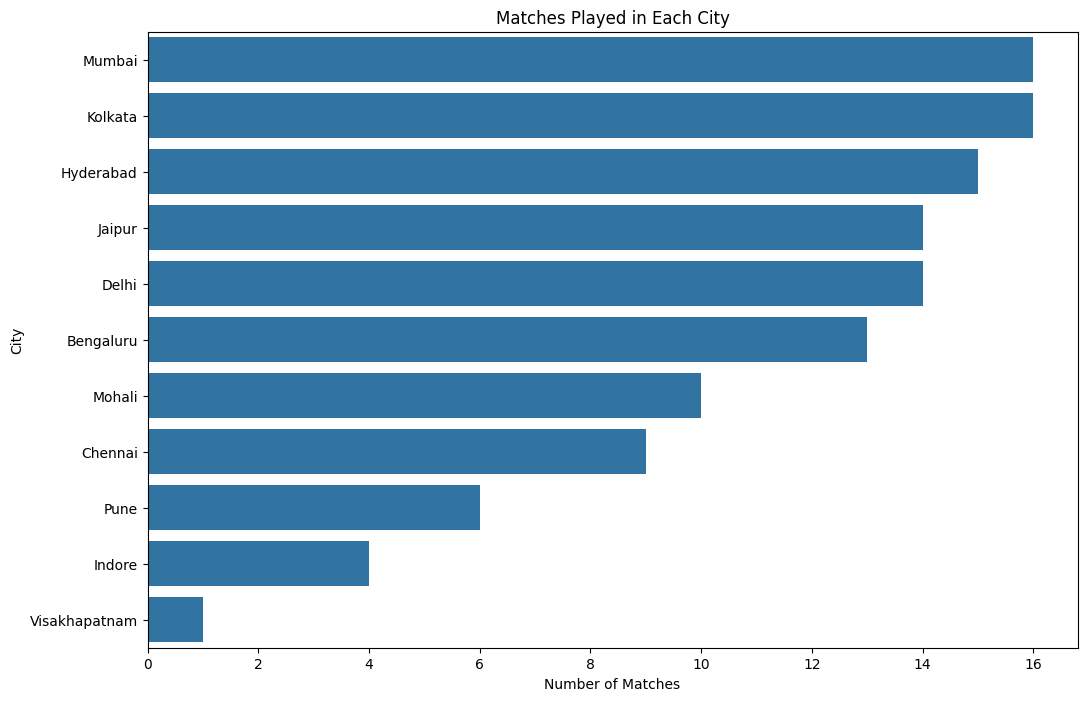

In [28]:
plt.figure(figsize=(12, 8))
city_matches = df2['city'].value_counts()
sns.barplot(x=city_matches.values, y=city_matches.index)
plt.title('Matches Played in Each City')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()

## lollipop chart for Top players based on the player of the match awards 

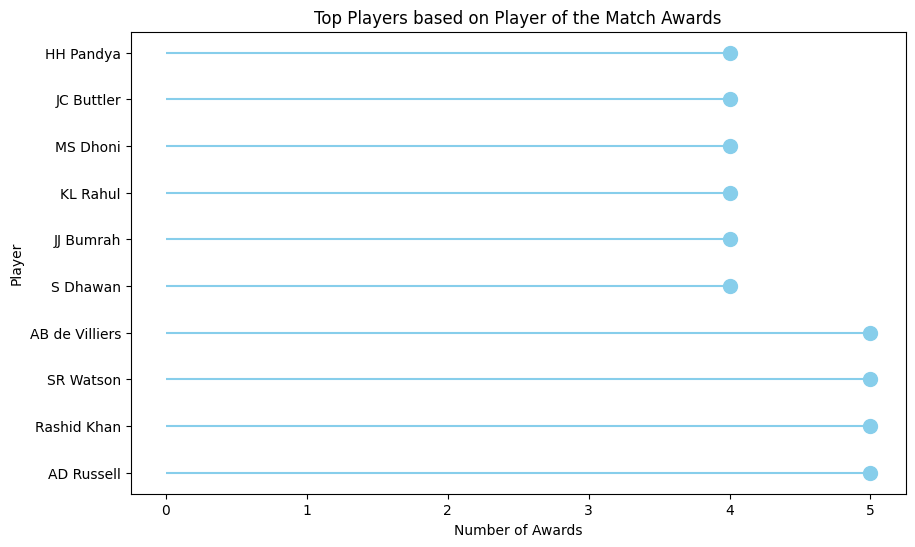

In [31]:
top_players = df2['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.hlines(y=top_players.index, xmin=0, xmax=top_players.values, color='skyblue')
plt.plot(top_players.values, top_players.index, "o", markersize=10, color='skyblue')
plt.title('Top Players based on Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()

## Win by runs vs win by wickets

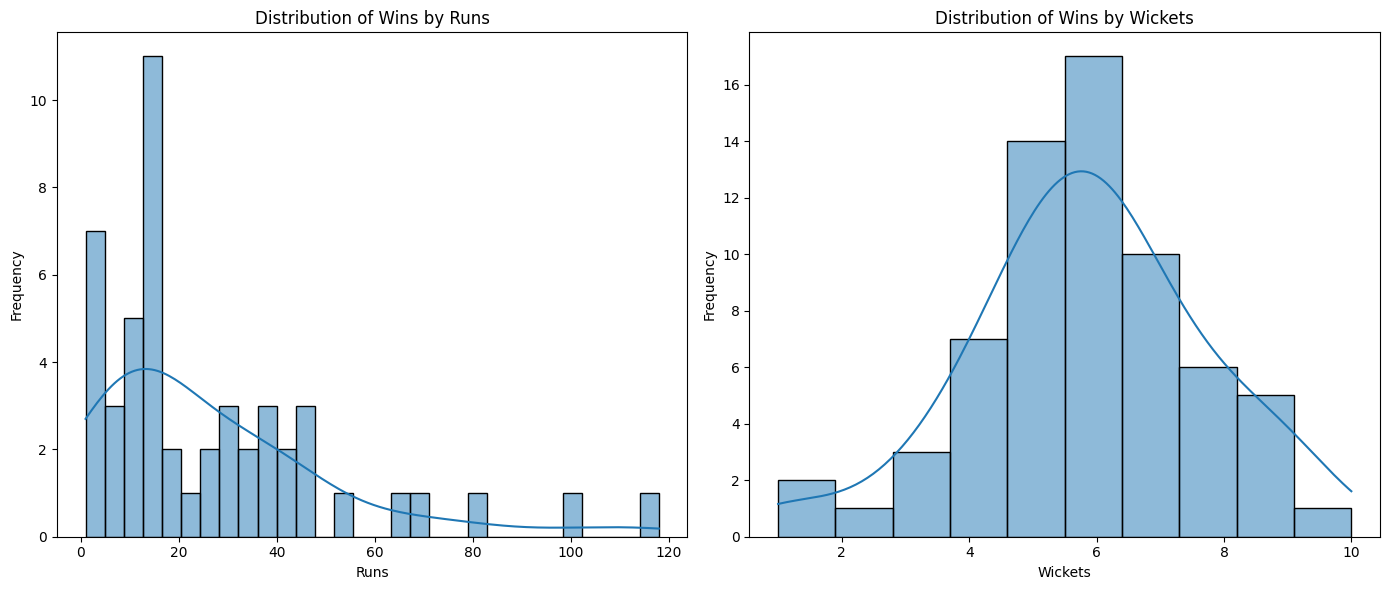

In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2[df2['win_by_runs'] > 0]['win_by_runs'], bins=30, kde=True)
plt.title('Distribution of Wins by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df2[df2['win_by_wickets'] > 0]['win_by_wickets'], bins=10, kde=True)
plt.title('Distribution of Wins by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Analyze how each team's performance has evolved over different seasons

<Figure size 1200x600 with 0 Axes>

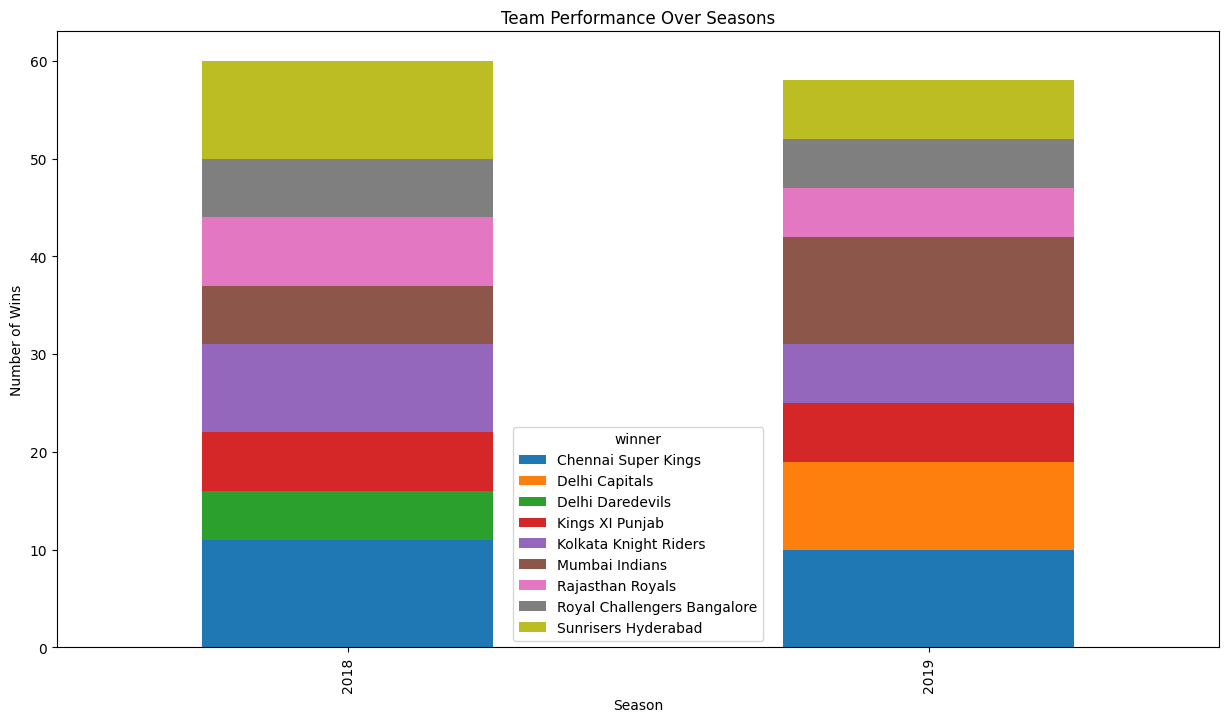

In [37]:
plt.figure(figsize=(12, 6))
team_season_wins = df2.groupby(['season', 'winner']).size().unstack(fill_value=0)
team_season_wins.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Team Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.show()


## Analyze the performance of top players in terms of runs scored, wickets taken, etc.

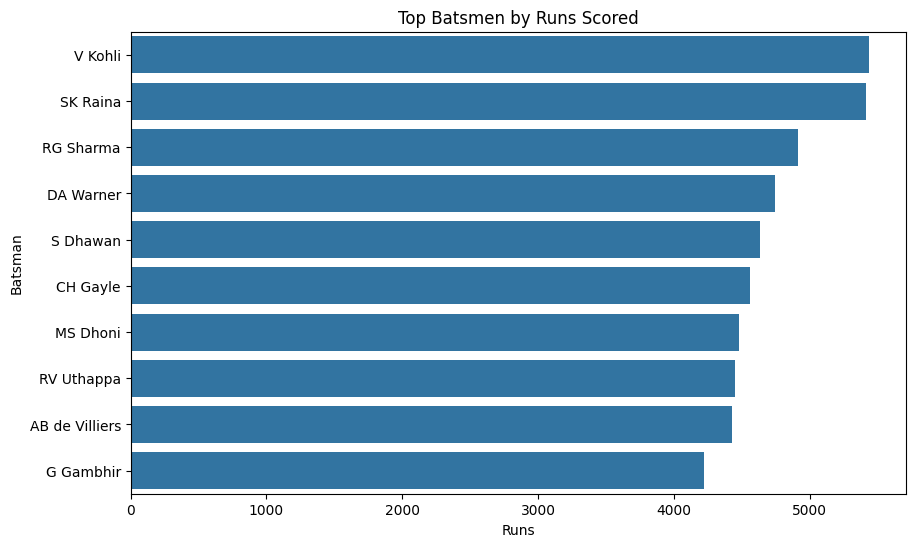

In [38]:
top_batsmen = df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, orient='h')
plt.title('Top Batsmen by Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()


## Pie chart for Win percentage by team 

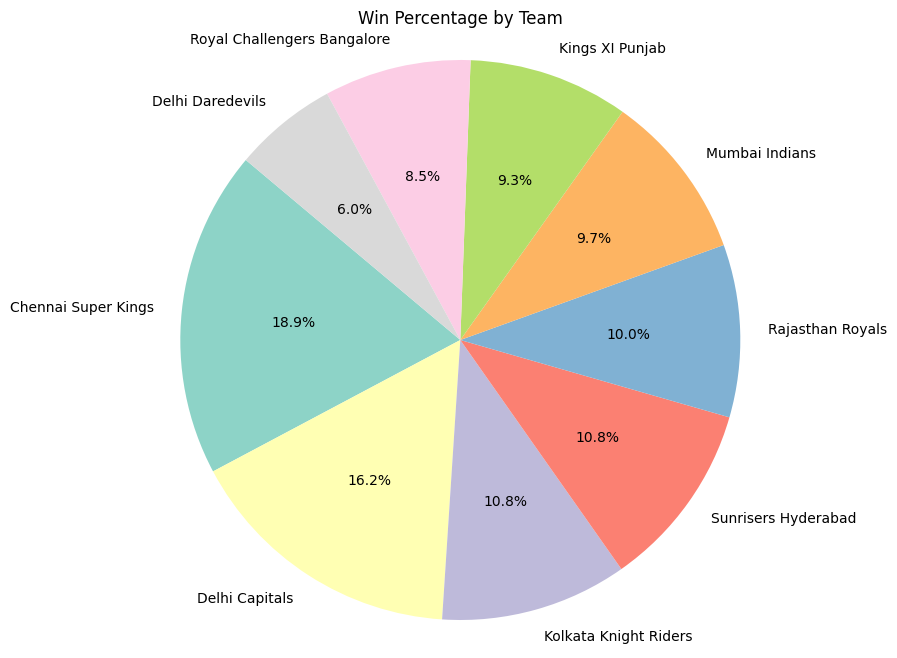

In [25]:
win_percentage = (match_wins / df2['team1'].value_counts()) * 100
win_percentage = win_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Win Percentage by Team')
plt.axis('equal')
plt.show()


## Key Insights:

- The distribution of runs scored in each over varies, with some overs being more crucial in determining the match outcome.
- Teams like Chennai Super Kings and Delhi capitals have a higher number of wins.
- Cities like Mumbai and Kolkata host a significant number of matches.
- Players such as v kohli and SK raina frequently win Player of the Match awards.
- The win percentage highlights teams with consistent performance.


# Task Completed